In [1]:
from fastcore.all import *
from duckduckgo_search import DDGS #  Web-Recherche, Bildersuche oder Datensammlung

## Download Images

In [2]:
def search_images(keywords, max_images=200): 
    return L(DDGS().images(keywords=keywords, max_results=max_images)).itemgot('image')

In [3]:
# test image suche
urls = search_images('bird photos', max_images=1)
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

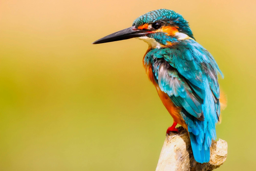

In [4]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(url=urls[0], dest=dest, show_progress=False)


from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

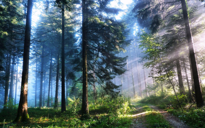

In [5]:
download_url(url=search_images('forest photos', max_images=1)[0], dest='forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(205,205)

In [18]:
for o in searches:
    dest = (path/o)
    print(f"Erstelle Ordner: {dest}")
    dest.mkdir(exist_ok=True, parents=True)
    
    try:
        print(f"Suche nach '{o} photo'")
        urls = search_images(f'{o} photo')
        print(f"Gefundene URLs: {len(urls)}")
        download_images(dest, urls=urls)
        sleep(60)

        print(f"Suche nach '{o} sun photo'")
        urls = search_images(f'{o} sun photo')
        print(f"Gefundene URLs: {len(urls)}")
        download_images(dest, urls=urls)
        sleep(60)

        print(f"Suche nach '{o} shade photo'")
        urls = search_images(f'{o} shade photo')
        print(f"Gefundene URLs: {len(urls)}")
        download_images(dest, urls=urls)
        sleep(60)

        resize_images(dest, max_size=400)

    except Exception as e:
        print(f"Fehler bei {o}: {e}")

Erstelle Ordner: cat_or_dog/cat
Suche nach 'cat photo'
Gefundene URLs: 200
Suche nach 'cat sun photo'
Gefundene URLs: 200
Suche nach 'cat shade photo'
Gefundene URLs: 200


/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/PIL/I

Erstelle Ordner: cat_or_dog/dog
Suche nach 'dog photo'
Fehler bei dog: https://duckduckgo.com/i.js?l=wt-wt&o=json&q=dog+photo&vqd=4-184774862132461119055403242303772919269&f=%2C%2C%2C%2C%2C&p=1 403 Ratelimit


## Train the model

In [19]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/PIL/Image.py:3570: User

73

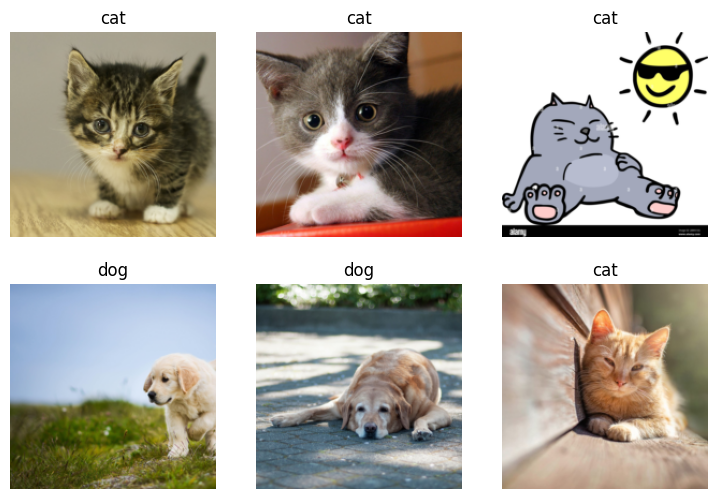

In [20]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='aquish')]
).dataloaders(path)

dls.show_batch(max_n=6)

## Train the model

In [21]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.688778,0.381536,0.112583,00:45


/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.347975,0.285065,0.076159,00:48
1,0.221757,0.276348,0.056291,00:48
2,0.169997,0.284533,0.072848,00:49
3,0.124725,0.305176,0.056291,00:49
4,0.094020,0.311288,0.052980,00:48


In [22]:
learn.export('model.pkl')